# Exploração dos dados 

## Carregando os dados

In [30]:
import requests
import zipfile
from scipy.io import arff
import pandas as pd
import io

url_arquivo_dados = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'

# copia os dados do sevidor
r = requests.get(url_arquivo_dados, stream=True)

# descompacta
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

# le o arquivo column_2C_weka.arff e mostra na forma de uma tabela.
dados_metadados = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(dados_metadados[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


# Analisando os dados

## pandas

O pandas é uma biblioteca de código aberto licenciada por BSD que fornece estruturas de dados de alto desempenho e fáceis de usar e ferramentas de análise de dados para a linguagem de programação Python.

O Pandas DataFrames são a representação na memória mais amplamente usada de coleções de dados complexas dentro do Python.

In [31]:
# Instalar pandas
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


Para importar o pandas:

In [32]:
# Importa Pandas 
import numpy as np

Ao instalar o Pandas utilizando um gerenciador de pacotes Python, como o pip, as dependências serão verificadas e instaladas automaticamente. Por exemplo, ao executar o comando pip install pandas, o Pandas será instalado juntamente com as bibliotecas necessárias, entre elas temos a xlrd e openpyxl.

As bibliotecas xlrd e openpyxl são bibliotecas populares em Python para trabalhar com arquivos Excel (.xls e .xlsx). Elas fornecem funcionalidades para ler, escrever e manipular dados em planilhas do Excel.

- xlrd: A biblioteca xlrd é usada para ler dados de arquivos Excel antigos (.xls) no formato binário. Ela permite extrair dados de planilhas, ler valores de células, obter informações sobre formatação, estilos, fórmulas e outras propriedades das células. No entanto, a xlrd não suporta a gravação ou criação de novos arquivos Excel.

- openpyxl: A biblioteca openpyxl é usada para ler, escrever e modificar arquivos Excel modernos (.xlsx) no formato XML. Ela oferece suporte completo à leitura e gravação de dados, formatação, estilos, fórmulas, imagens e outros recursos do Excel. Com o openpyxl, você pode criar novas planilhas, adicionar ou remover células, mesclar células, aplicar estilos, definir fórmulas e muito mais.

Ambas as bibliotecas são muito úteis quando você precisa automatizar tarefas relacionadas a dados em planilhas do Excel usando Python. A escolha entre xlrd e openpyxl depende do formato do arquivo Excel que você está trabalhando. Se você estiver trabalhando com arquivos .xls mais antigos, a xlrd é a opção apropriada. Para arquivos .xlsx mais recentes, a openpyxl é a biblioteca mais recomendada.

In [33]:
!pip install xlrd openpyxl

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.8 MB/s eta 0:00:00a 0:00:01


## Iniciando a Análise

Vamos começar a examinar os dados no conjunto de dados (dataset).
Primeiro, você usaremos a função **shape** para examinar o número de linhas e colunas

In [34]:
df.shape

(310, 7)

Agora, obteremos uma lista com os nomes das colunas.

In [35]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

É possível ver os seis componentes biomecânicos, e a coluna alvo (target) é chamada *class* (classe).

Quais tipos de dados nós temos?

Se você não tiver nomes de coluna no arquivo de origem, poderá passá-los como um parâmetro (conforme demonstrado no código a seguir). 

In [36]:
url = "https://dados-mba-python-2023.s3.amazonaws.com/carro.csv"
r = requests.get(url, stream=True)

df_carros = pd.read_csv(url,sep=',',names=['preço_compra','preço_manutenção','portas','pessoas','porta-malas','segurança','classe'])

A função **describe()** é um método do Pandas que é aplicado a um DataFrame ou a uma Série e fornece um resumo estatístico dos dados.

Quando os valores não são numéricos, a função describe() no Pandas retorna estatísticas descritivas diferentes das mencionadas anteriormente. Em vez de calcular a média, desvio padrão e quartis, ela retorna estatísticas resumidas sobre os valores não numéricos.

Para colunas com valores categóricos ou objetos, o describe() retorna as seguintes estatísticas:

- Contagem (count): o número de valores não nulos na coluna.
- Valores únicos (unique): o número de valores distintos na coluna.
- Valor mais frequente (top): o valor mais comum na coluna.
- Frequência do valor mais frequente (freq): a contagem do valor mais comum na coluna.

In [37]:
df_carros.describe()

,preço_compra,preço_manutenção,portas,pessoas,porta-malas,segurança,classe
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,m_alta,m_alta,2,2,pequeno,baixa,n_aceito
freq,432,432,432,576,576,576,1210


Quando aplicado a um DataFrame, com valores numéricos o método **describe()*** calcula estatísticas descritivas para cada coluna numérica do DataFrame. Ele retorna um novo DataFrame contendo as seguintes estatísticas para cada coluna:

- Contagem (count): o número de valores não nulos na coluna.
- Média (mean): a média aritmética dos valores na coluna.
- Desvio padrão (std): o desvio padrão dos valores na coluna.
- Valor mínimo (min): o valor mínimo da coluna.
- Quartil inferior (25%): o valor que divide os dados em 25% dos valores mais baixos.
- Mediana (50%): o valor que divide os dados em duas partes iguais.
- Quartil superior (75%): o valor que divide os dados em 25% dos valores mais altos.
- Valor máximo (max): o valor máximo da coluna.

In [38]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


O atributo **dtypes** é utilizado em objetos DataFrame no Pandas para obter os tipos de dados das colunas.

Ao acessar df.dtypes, onde df é um DataFrame, o Pandas retornará uma série que exibe o tipo de dado de cada coluna do DataFrame. Cada valor na série representa o tipo de dado da respectiva coluna.

Esse atributo é útil para compreender a estrutura dos dados em um DataFrame e para verificar se os tipos de dados estão corretos, especialmente ao lidar com grandes conjuntos de dados e realizar operações de análise e manipulação de dados.

In [39]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Temos seis tipos float (ponto flutuante) para os componentes (features) biomecânicos, mas o alvo (target) é uma class (classe).

Agora que você tem seus dados em um formato legível, pode executar estatísticas descritivas nos dados para melhor entendê-los. As estatísticas descritivas oferecem informações valiosas sobre seus dados para que você possa pré-processar os dados de maneira mais eficaz e prepará-los para o modelo de ML. 

Para examinar dados estatísticos da primeira coluna, você pode usar a função **describe**.

In [40]:
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

In [41]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


A função **info()** é um método no Pandas que fornece um resumo conciso sobre um objeto DataFrame, incluindo informações sobre os tipos de dados das colunas, a contagem de valores não nulos e o uso de memória.

Quando aplicado a um DataFrame, o método info() exibe as seguintes informações:

- O índice (rótulos das linhas) do DataFrame.
- O tipo de dado de cada coluna.
- A contagem de valores não nulos em cada coluna.
- O uso de memória do DataFrame.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


A função **astype()** é utilizada para realizar essa conversão de tipo de dado. Após a execução dessa linha, os valores da coluna "pelvic_incidence" serão do tipo inteiro.

In [43]:
df['pelvic_incidence'] = df['pelvic_incidence'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    int64  
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 17.1+ KB


In [44]:
df['class'].describe()

count             310
unique              2
top       b'Abnormal'
freq              210
Name: class, dtype: object

**Tarefa de desafio:** Tente atualizar o código na célula anterior para visualizar as estatísticas de outros componentes (features). Quais componentes têm anomalias (outliers) que talvez você queira examinar?

In [45]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10])
s.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64

Como esse conjunto de dados (dataset) tem apenas seis componentes (features), podemos exibir as estatísticas de cada componente (feature) executando **describe** em todo o DataFrame.

## Interpretando a descrição dos dados

Os resultados mostram 8 números para cada coluna em seu conjunto de dados original. O primeiro número, a contagem, mostra quantas linhas têm valores não omissos.

O segundo valor é a média; std é o desvio padrão, que mede a dispersão numérica dos valores. Para interpretar os valores min, 25%, 50%, 75% e max, imagine classificar cada coluna do valor mais baixo para o mais alto. O primeiro (menor) valor é o min. Se você percorrer um quarto da lista, encontrará um número maior que 25% dos valores e menor que 75% dos valores. Esse é o valor de 25% (pronuncia-se "25º percentil"). Os percentis 50 e 75 são definidos de forma análoga e o máximo é o maior número.

In [46]:
# lista de percentis
perc =[.20, .40, .60, .80]
df.describe(percentiles = perc)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.003226,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.230683,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.000000,-6.554948,14.000000,13.366931,70.082575,-11.058179
20%,44.000000,9.699469,35.563797,31.972798,108.537398,0.491581
40%,53.000000,14.150689,44.000000,38.000305,116.057566,5.877651
50%,58.000000,16.357689,49.562398,42.404912,118.268178,11.767934
60%,64.000000,18.793934,54.868854,45.659512,120.930051,27.305859
80%,76.000000,24.233868,67.053422,54.241126,127.708285,51.877748
max,129.000000,49.431864,125.742385,121.429566,163.071041,418.543082


**Importante:** 
- Há algum componente (feature) que não se apresente bem distribuído? 
- Há algum componente (feature) com anomalias (outliers) que você deseja examinar? 
- Parece que pode haver alguma correlação entre os componentes (features)?

Nem sempre é fácil fazer observações quando você olha apenas para números, portanto, agora você plotará esses valores.

Um gráfico de densidade ameniza a curva. Parece que pode haver um aumento em torno de **400**. Visualize os dados com um *histogram* (histograma).

<AxesSubplot: ylabel='Frequency'>

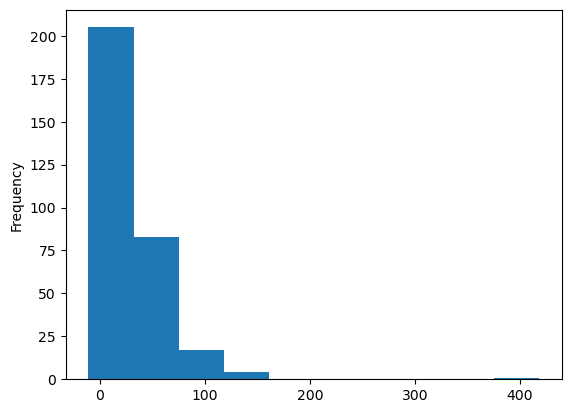

In [47]:
df['degree_spondylolisthesis'].plot.hist()

<AxesSubplot: >

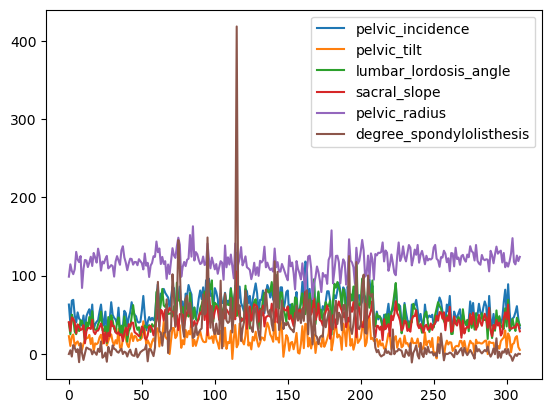

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

<AxesSubplot: >

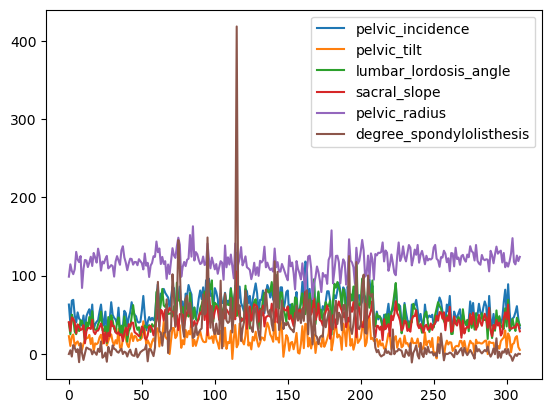

In [49]:
df.plot()

Agora, você plotará a distribuição dos valores para cada componente usando um gráfico *density or kernel density estimate (KDE)* (densidade ou estimativa de densidade por kernel).

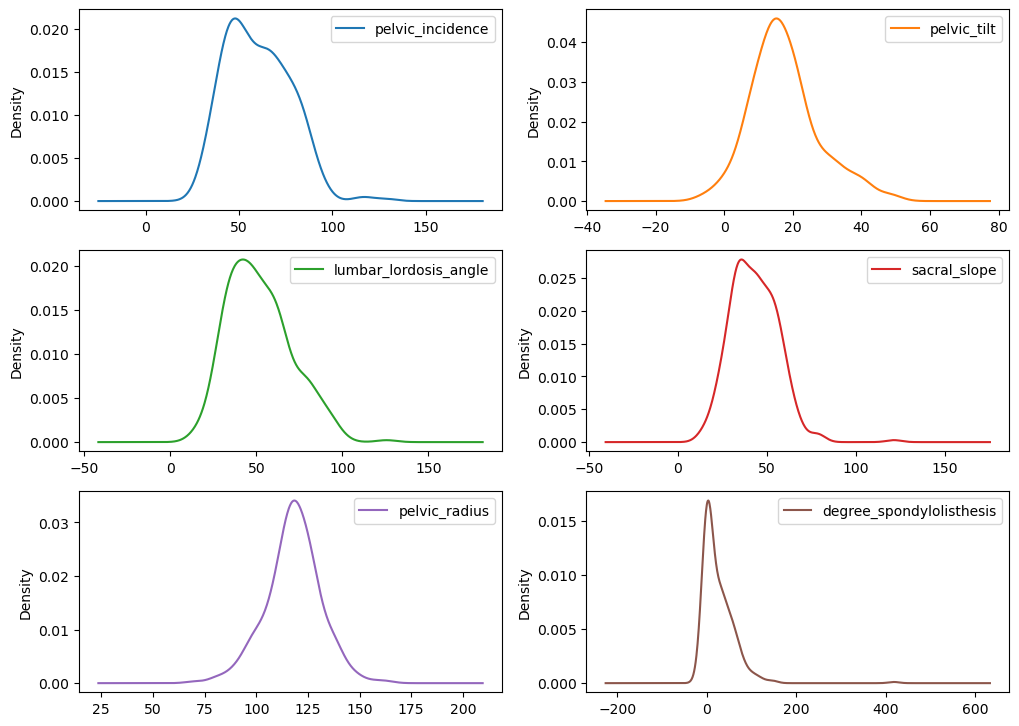

In [50]:
import matplotlib.pyplot as plt
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

Algumas das visualizações se destacam?

### Investigar degree_spondylolisthesis
Agora você investigará **degree_spondylolisthesis**:

Comece com o *density plot* (gráfico de densidade), que, se você lembrar, mostra a *distribution of the values* (distribuição dos valores).

<AxesSubplot: ylabel='Density'>

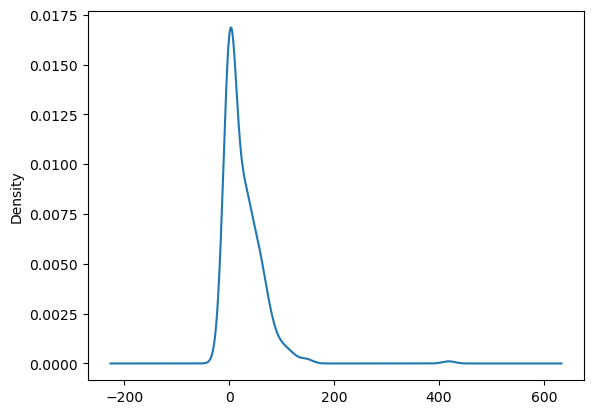

In [51]:
df['degree_spondylolisthesis'].plot.kde()

Ao usar um *box plot* (gráfico diagrama de caixa), você pode ver se há anomalias (outliers).

<AxesSubplot: >

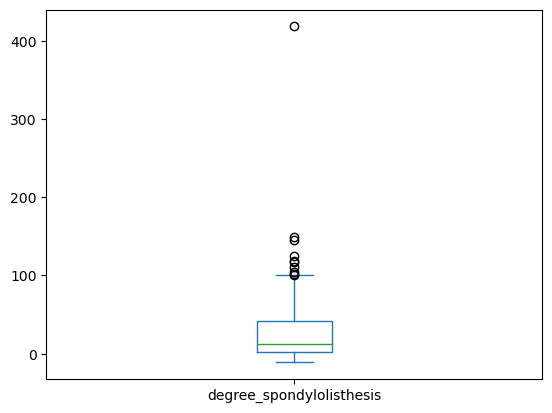

In [52]:
df['degree_spondylolisthesis'].plot.box()

Você pode ver um pequeno aumento em torno de **400**. Às vezes, exceções como esta podem levar ao descarte de modelos de treinamento. A única maneira de descobrir seria testar o modelo com e sem as anomalias (outliers) e comparar as pontuações (scores) dos modelos. 

Você pode ver o que já parece um cluster no gráfico diagrama de de caixa (box plot) acima, o qual parece ter um valor máximo já definido. Há uma correlação entre esses pontos de dados (data points) e o alvo (target)?

Antes de procurar uma correlação, você examinará mais o alvo (target).

## Analisando o alvo (target)

Primeiro, que tipo de distribuição você tem?

In [53]:
df['class'].value_counts()

b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64

Parece que você tem cerca de 1/3 *Normal* e 2/3 *Abormal* (Anormal). Esse resultado deve ser aceitável, mas se você pudesse obter mais dados, você gostaria de fazer mais tentativas e de equilibrar melhor os números. 

Os valores do tipo class (classe) não funcionarão para o seu modelo de ML, portanto, você irá converter essa coluna em um valor numérico. Você pode usar o *mapper* (mapeador) para essa tarefa.

In [54]:
class_valor = {b'Abnormal':1,b'Normal':0}
df['class']=df['class'].replace(class_valor)

Agora, é possível plotar *degree_spondylolisthesis* para o alvo (target).

<AxesSubplot: xlabel='class', ylabel='degree_spondylolisthesis'>

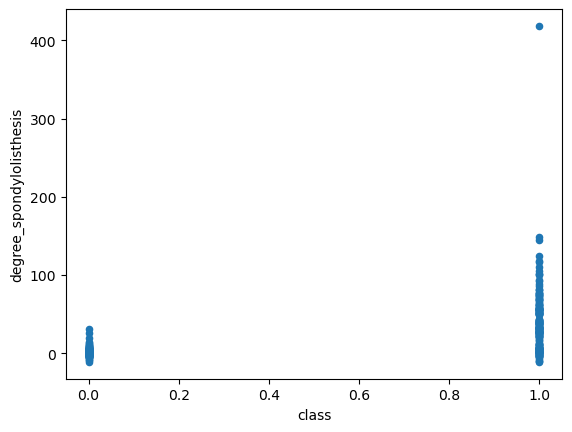

In [55]:
df.plot.scatter(y='degree_spondylolisthesis',x='class')

O que você vê?

Embora pareça haver uma conexão entre os valores altos e as anormalidades, também há muitos valores que estão no mesmo intervalo. Portanto, pode haver uma correlação, mas vale a pena analisar melhor os dados.

**Desafio:** Usando as células anteriores, determine como os valores de outros componentes (features) correspondem em relação ao alvo (target).

### Visualizando múltiplas variáveis

Como demonstram as etapas anteriores, as visualizações podem ser muito importantes. Às vezes, você poderá querer analisar múltiplos pontos de dados (data points). Você pode fazer isso usando *groupby*.

A colocação dos componentes (features) dos dois valores *Abnormal* (Anormal) e *Normal* (normal) lado a lado pode ajudá-lo a observar outras diferenças.

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

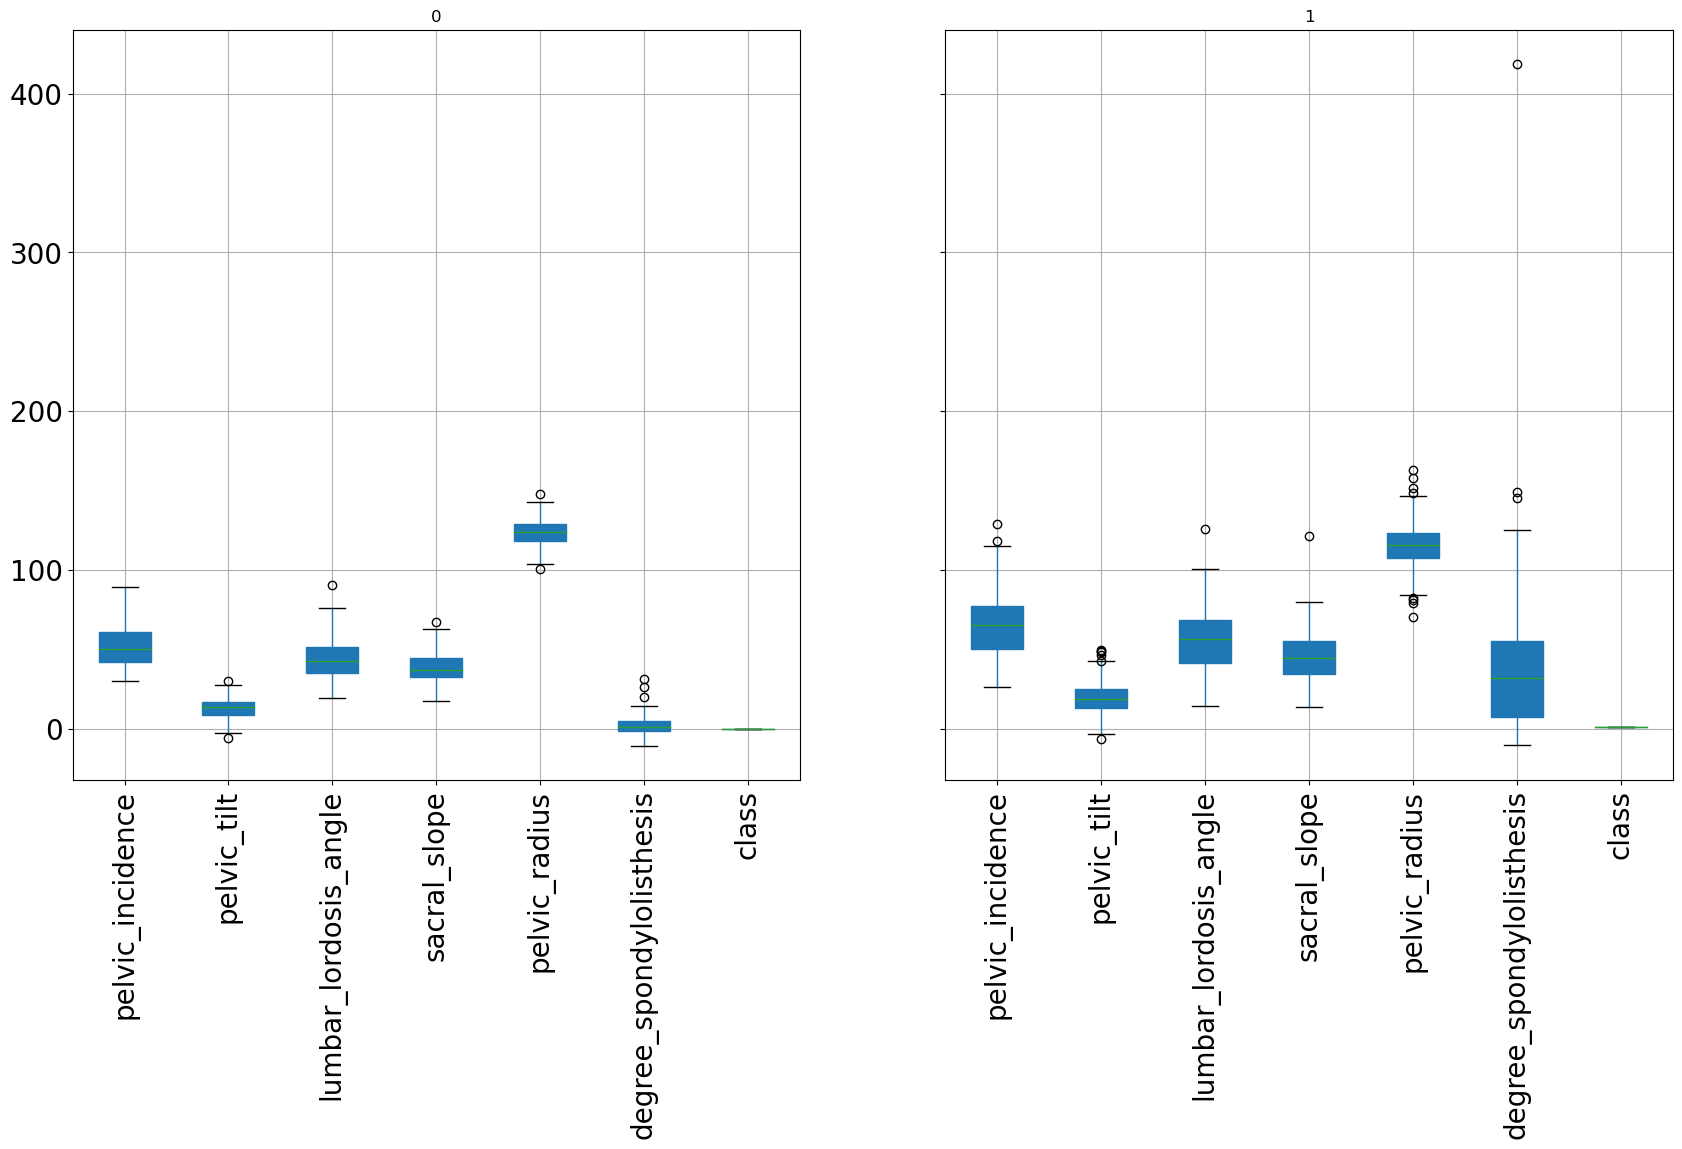

In [56]:
df.groupby('class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

array([[<AxesSubplot: xlabel='degree_spondylolisthesis', ylabel='degree_spondylolisthesis'>,
        <AxesSubplot: xlabel='pelvic_tilt', ylabel='degree_spondylolisthesis'>],
       [<AxesSubplot: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>,
        <AxesSubplot: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>]],
      dtype=object)

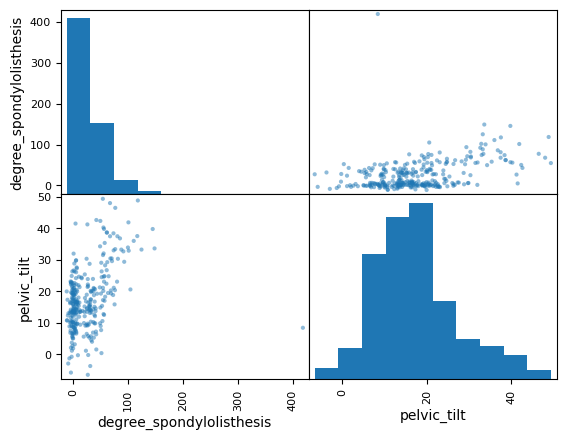

In [57]:

pd.plotting.scatter_matrix(
    df[['degree_spondylolisthesis',
        'pelvic_tilt']])


Você também pode plotar esses dados.

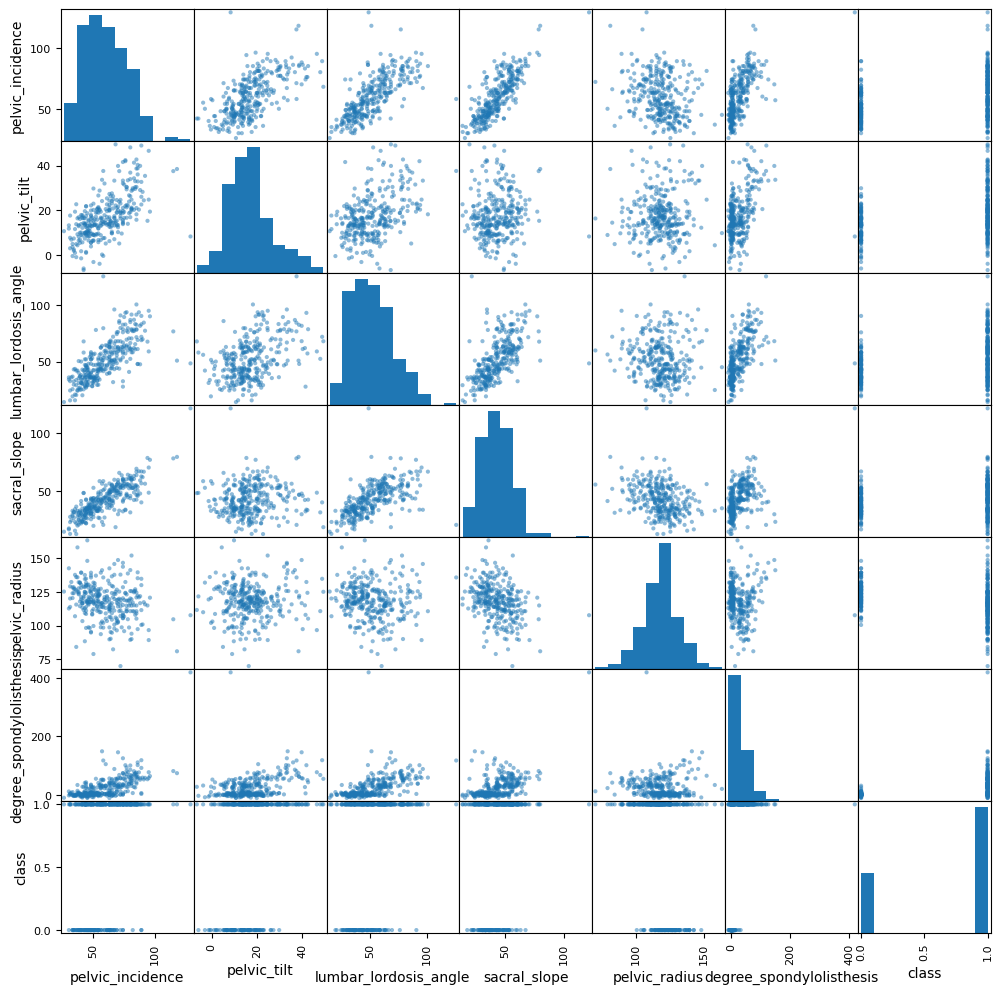

In [58]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

Com um gráfico de dispersão, você pode querer identificar regiões especiais às quais um determinado subconjunto de dados pertence.


Muitas vezes é mais fácil visualizar os números se eles estiverem representados por cores. Agora, considere um mapa de calor. Você tem o número mais alto (que é 1) em verde escuro e -1 em marrom escuro. A cor fornece as direções positiva e negativa e a intensidade das correlações.

In [59]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629401,0.717795,0.814631,-0.248350,0.638944,0.354732
pelvic_tilt,0.629401,1.000000,0.432764,0.062345,0.032668,0.397862,0.326063
lumbar_lordosis_angle,0.717795,0.432764,1.000000,0.598387,-0.080344,0.533667,0.312484
sacral_slope,0.814631,0.062345,0.598387,1.000000,-0.342128,0.523557,0.210602
pelvic_radius,-0.248350,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.309857
degree_spondylolisthesis,0.638944,0.397862,0.533667,0.523557,-0.026065,1.000000,0.443687
class,0.354732,0.326063,0.312484,0.210602,-0.309857,0.443687,1.000000


Ao usar **seaborn**, você pode visualizar a correlação como um *heatmap* (mapa de calor).

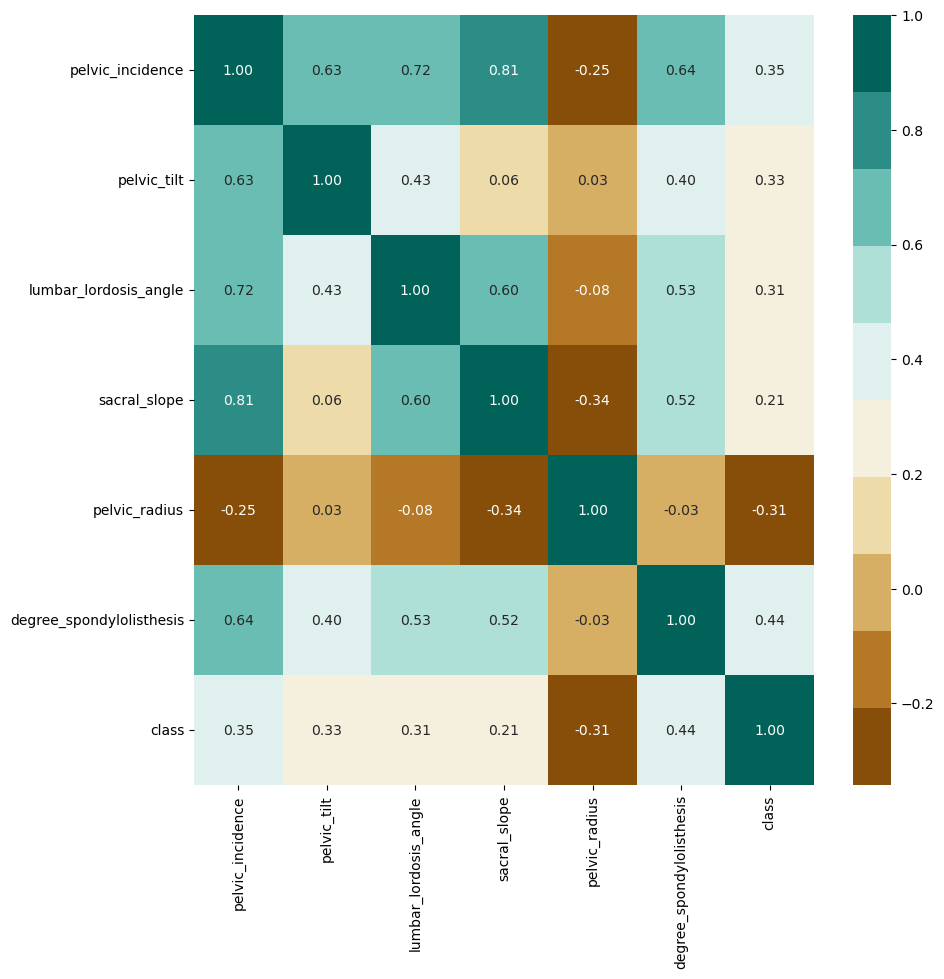

In [60]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

#colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()